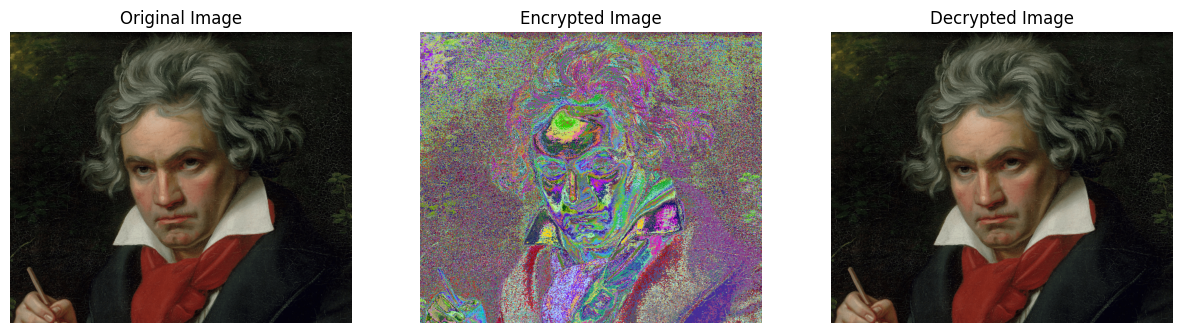

In [ ]:
import random
import math
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



def is_prime_num(n):
    if n < 2:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def prime_numbers(start, end):
    primes = [num for num in range(start, end + 1) if is_prime_num(num)]
    return random.choice(primes)

def mod_inverse(e, phi):
    for d in range(3, phi):
        if (d * e) % phi == 1:
            return d
    raise ValueError("Mod inverse does not exist")

def mod_exp(base, exp, mod):
    result = 1
    base = base % mod
    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        exp = exp >> 1
        base = (base * base) % mod
    return result

img = cv2.imread('bethoven.png')

p, q = prime_numbers(10,100), prime_numbers(10,100)
n = p * q
phi_n = (p - 1) * (q - 1)

e = random.randint(3, phi_n - 1)
while math.gcd(e, phi_n) != 1:
    e = random.randint(3, phi_n - 1)

d = mod_inverse(e, phi_n)

row,col=img.shape[0],img.shape[1]

encrypted_img = np.zeros((row, col, 3), dtype=np.uint16)

for x in range(row):
    for y in range(col):
        for rgb in range(3):
            pixel_value = img[x, y, rgb]
            encrypted_pixel_value = mod_exp(pixel_value, e, n)
            encrypted_img[x, y, rgb] = encrypted_pixel_value


decrypted_img = np.zeros((row, col, 3), dtype=np.uint8)

for x in range(row):
    for y in range(col):
        for rgb in range(3):
            encrypted_pixel_value = encrypted_img[x, y, rgb]
            decrypted_pixel_value = mod_exp(encrypted_pixel_value, d, n)
            decrypted_img[x, y, rgb] = decrypted_pixel_value


plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(encrypted_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Encrypted Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(decrypted_img, cv2.COLOR_BGR2RGB))
plt.title('Decrypted Image')
plt.axis('off')

plt.show()